# Task 1:

## Aim: Enhance the emotion detection model by integrating voice tone analysis for a more comprehensive and accurate emotion recognition.

### Dataset used: Toronto emotion speech set

# importing all the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from glob import glob
import cv2
import random,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,MaxPool2D
from tensorflow.keras.layers import BatchNormalization,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Input
from tensorflow.keras.layers import Conv2D,Convolution1D
from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow_version:",tf.__version__)
import librosa
import librosa.display
from IPython.display import Audio
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorflow_version: 2.11.1


# Loading Audio Dataset

In [2]:
paths=[]
labels=[]
for dirname, _,filenames in os.walk(r"C:\Users\shailesh mhalsekar\Desktop\Audio Emotion detection\toronto emotional speech data"):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split(',')[0]
        labels.append(label.lower())
print("dataset is loaded")

dataset is loaded


In [3]:
df=pd.DataFrame() # Creating a dataframe 
df["speech"]=paths
df["label"]=labels
df.head() # getting initial 5 rows

,speech,label
0,C:\Users\shailesh mhalsekar\Desktop\Audio Emot...,angry.wav
1,C:\Users\shailesh mhalsekar\Desktop\Audio Emot...,angry.wav
2,C:\Users\shailesh mhalsekar\Desktop\Audio Emot...,angry.wav
3,C:\Users\shailesh mhalsekar\Desktop\Audio Emot...,angry.wav
4,C:\Users\shailesh mhalsekar\Desktop\Audio Emot...,angry.wav


# Extracting Features

In [4]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [5]:
extract_mfcc(df['speech'][0]) #Extracted Features

array([-3.39321594e+02,  5.02437897e+01, -2.18205872e+01,  1.30996275e+01,
       -2.22163544e+01,  4.74619293e+00, -9.02574778e-01, -1.91518154e+01,
       -3.70908689e+00, -5.25005341e+00, -2.08642483e+01,  9.03661728e+00,
       -1.37223825e+01,  9.56011772e+00,  3.22395056e-01, -7.77842474e+00,
        4.21398848e-01, -1.14454365e+00, -5.09333801e+00,  1.93418396e+00,
       -3.84865105e-01, -3.67262185e-01, -6.57713223e+00, -1.17523921e+00,
       -2.11491251e+00,  3.60109258e+00,  2.96155000e+00,  6.64119053e+00,
        8.86364555e+00,  1.28879604e+01,  1.29713392e+01,  1.36106644e+01,
        6.75442982e+00,  6.87960768e+00,  1.33222532e+00,  5.43466616e+00,
        1.00862420e+00,  2.95431995e+00,  1.28983438e+00,  3.57729745e+00],
      dtype=float32)

In [6]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-339.3216, 50.24379, -21.820587, 13.0996275, ...
1       [-323.86, 70.17526, -5.03724, -14.311751, -36....
2       [-329.51895, 22.864578, 1.3039634, 8.736768, -...
3       [-365.65436, 46.842075, -15.8241, 10.5632515, ...
4       [-389.04993, 90.45158, 5.151686, 44.672207, 0....
                              ...                        
1395    [-406.48053, 80.379875, 32.462395, 46.579094, ...
1396    [-426.90918, 102.54756, 24.800041, 43.048096, ...
1397    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
1398    [-434.8618, 89.906364, 28.373262, 39.577065, -...
1399    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 1400, dtype: object

In [7]:
X = [x for x in X_mfcc]
X = np.array(X) # converting into an array
X.shape  # to get the shape of an array x

(1400, 40)

In [8]:
## input split
X = np.expand_dims(X, -1)
X.shape

(1400, 40, 1)

# Encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder
encode= OneHotEncoder()
y = encode.fit_transform(df[['label']]) # encoding
y = y.toarray() # converting into an array
y.shape # to get the shape of an array y

(1400, 7)

# model creation

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(10, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(7, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 7)                 5

# Train the model

In [11]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
18/18 [==============================] - 9s 119ms/step - loss: 1.9100 - accuracy: 0.1955 - val_loss: 2.1409 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 1s 35ms/step - loss: 1.8543 - accuracy: 0.2286 - val_loss: 2.2101 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 1s 36ms/step - loss: 1.8099 - accuracy: 0.2616 - val_loss: 2.2862 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 1s 35ms/step - loss: 1.7589 - accuracy: 0.2884 - val_loss: 2.3604 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 1s 36ms/step - loss: 1.7165 - accuracy: 0.2812 - val_loss: 2.4287 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 1s 35ms/step - loss: 1.6635 - accuracy: 0.3187 - val_loss: 2.4861 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 1s 35ms/step - loss: 1.5964 - accuracy: 0.3438 - val_loss: 2.5695 - val_accur

In [12]:
## Saving the model
model.save('Audio_detection.h5')

# Plotting / visualizing the results

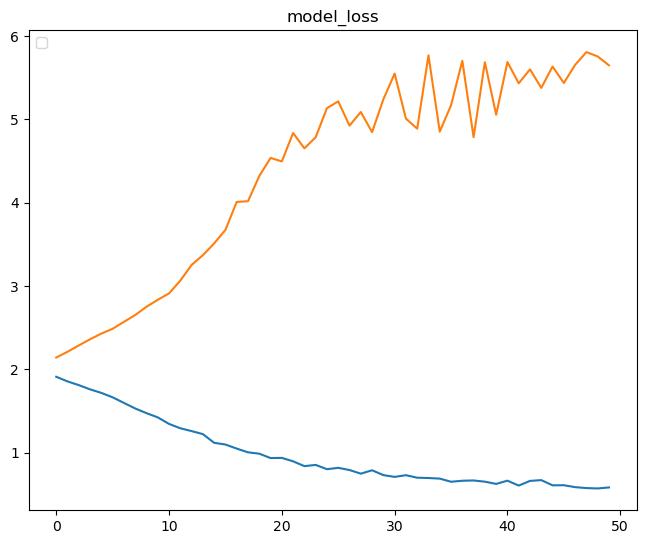

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.legend('train','validation',loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


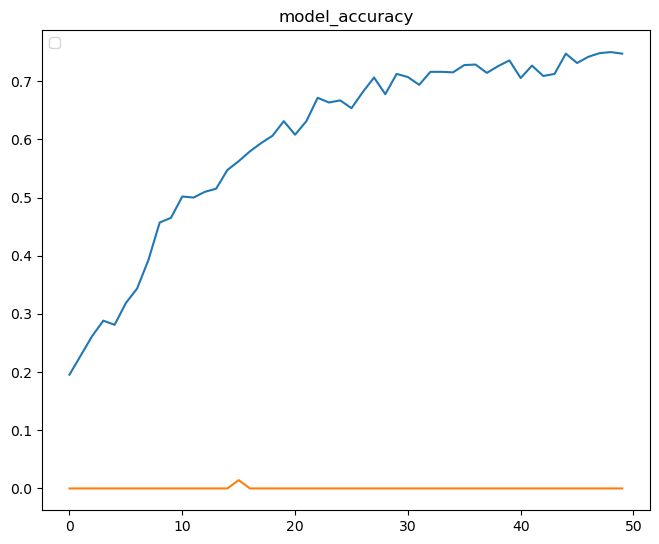

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.legend('train','validation',loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


# model saving 

In [15]:
model_json = model.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)